# Sentiment Analysis in Python

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Machine Learning Approach

<h3 >Import the relevant libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
import nltk

### Import the dataset

In [3]:
df=pd.read_csv("output.csv")

In [4]:
df['review'][6]

'If I  could give this location a zero on customer service, I  would. Pulled into drive through at 8:07 and placed a simple order. I order a regular hamburg and cookies. Once I paid and pulled up to the window to pick up, I  was told to pull up to the #1 space. I sat there and sat there and.........25 minutes later, no order. I  went in and no one was at the counter. I yelled "hello" three times. A young lady came up asking who was handling the front counter. A young girl appeared. To make this complaint shorter, I  showed my receipt and another 5 minutes later I got my order. There was another order with a drink sitting on the counter that never got to the person who ordered it. After getting home, I  had no regular hamburg but had cookies. Everyone, don\'t even bother going to this location again. It\'s a horrible experience every time as you can see by other reviews.'

In [5]:
df.shape

(33396, 10)

In [6]:
df=df.head(10000)
df.shape

(10000, 10)

#                                       Text Preprocessing steps

## 1. Converting to Lower case

In [7]:
df['review']=df['review'].str.lower()

In [8]:

df['review'][6]

'if i  could give this location a zero on customer service, i  would. pulled into drive through at 8:07 and placed a simple order. i order a regular hamburg and cookies. once i paid and pulled up to the window to pick up, i  was told to pull up to the #1 space. i sat there and sat there and.........25 minutes later, no order. i  went in and no one was at the counter. i yelled "hello" three times. a young lady came up asking who was handling the front counter. a young girl appeared. to make this complaint shorter, i  showed my receipt and another 5 minutes later i got my order. there was another order with a drink sitting on the counter that never got to the person who ordered it. after getting home, i  had no regular hamburg but had cookies. everyone, don\'t even bother going to this location again. it\'s a horrible experience every time as you can see by other reviews.'

##  2. Removing HTML Tags

In [9]:
import re

In [10]:
def clean_html(text):
    clean=re.compile('<.*?>')
    return re.sub(clean,'',text)

In [11]:
df['review']=df['review'].apply(clean_html)

In [12]:
df['review'][1]

"it'd mcdonalds. it is what it is as far as the food and atmosphere go. the staff here does make a difference. they are all friendly, accommodating and always smiling. makes for a more pleasant experience than many other fast food places."

## 3. Remove Punctuation

In [13]:
df['review']

0       why does it look like someone spit on my food?...
1       it'd mcdonalds. it is what it is as far as the...
2       made a mobile order got to the speaker and che...
3       my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4       i repeat my order 3 times in the drive thru, a...
                              ...                        
9995                                                good 
9996                                           excellent 
9997                                             terrible
9998                                              neutral
9999                                              neutral
Name: review, Length: 10000, dtype: object

In [14]:
import string

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
exclude=string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [17]:
df['review']=df['review'].apply(remove_punc)

In [18]:
df['review'][6]

'if i  could give this location a zero on customer service i  would pulled into drive through at 807 and placed a simple order i order a regular hamburg and cookies once i paid and pulled up to the window to pick up i  was told to pull up to the 1 space i sat there and sat there and25 minutes later no order i  went in and no one was at the counter i yelled hello three times a young lady came up asking who was handling the front counter a young girl appeared to make this complaint shorter i  showed my receipt and another 5 minutes later i got my order there was another order with a drink sitting on the counter that never got to the person who ordered it after getting home i  had no regular hamburg but had cookies everyone dont even bother going to this location again its a horrible experience every time as you can see by other reviews'

## 4. Removing stop words

In [19]:
from nltk.corpus import stopwords

In [20]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ws\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
def remove_stopwords(text):
    x=[]
    for word in text.split():
        if word not in stopwords.words('english'):
            x.append(word)
    y=x[:]
    x.clear()
    return " ".join(y)

In [23]:
df['review']=df['review'].apply(remove_stopwords)

In [24]:
df['review']

0       look like someone spit food normal transaction...
1       itd mcdonalds far food atmosphere go staff mak...
2       made mobile order got speaker checked line mov...
3       mc crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...
4       repeat order 3 times drive thru still manage m...
                              ...                        
9995                                                 good
9996                                            excellent
9997                                             terrible
9998                                              neutral
9999                                              neutral
Name: review, Length: 10000, dtype: object

## 5. Stemming

In [25]:
from nltk.stem.porter import PorterStemmer

In [26]:
ps=PorterStemmer()

In [27]:
def stem_words(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return " ".join(z)

In [28]:
df['review']=df['review'].apply(stem_words)

In [29]:
df['review'][6]

'could give locat zero custom servic would pull drive 807 place simpl order order regular hamburg cooki paid pull window pick told pull 1 space sat sat and25 minut later order went one counter yell hello three time young ladi came ask handl front counter young girl appear make complaint shorter show receipt anoth 5 minut later got order anoth order drink sit counter never got person order get home regular hamburg cooki everyon dont even bother go locat horribl experi everi time see review'

In [30]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someon spit food normal transact eve...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonald far food atmospher go staff make ...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobil order got speaker check line move l...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispi chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manag mes...,1 star


In [31]:
df['review']=df['review'].str.replace('ï¿½',"")

In [32]:
df['review'].head(5)

0    look like someon spit food normal transact eve...
1    itd mcdonald far food atmospher go staff make ...
2    made mobil order got speaker check line move l...
3    mc crispi chicken sandwich  custom servic quick p
4    repeat order 3 time drive thru still manag mes...
Name: review, dtype: object

# VADER Sentiment Analysis

This technique is used to create a new column based on sentiments as Positive, Negative or Neutral.

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [34]:
nltk.download('vader_lexicon')
sa=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ws\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['review']
    my_id=row['reviewer_id']
    res[my_id]=sa.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [36]:
vader=pd.DataFrame(res).T

In [37]:
vader=vader.reset_index().rename(columns={'index':'reviewer_id'})
vader

,reviewer_id,neg,neu,pos,compound
0,1,0.047,0.769,0.184,0.5541
1,2,0.000,0.756,0.244,0.7003
2,3,0.059,0.941,0.000,-0.2500
3,4,0.000,1.000,0.000,0.0000
4,5,0.200,0.800,0.000,-0.7184
...,...,...,...,...,...
9995,9996,0.000,0.000,1.000,0.4404
9996,9997,0.000,0.000,1.000,0.4588
9997,9998,0.000,1.000,0.000,0.0000
9998,9999,0.000,1.000,0.000,0.0000


In [38]:
vader=vader.merge(df,how='left')
vader

,reviewer_id,neg,neu,pos,compound,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,0.047,0.769,0.184,0.5541,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someon spit food normal transact eve...,1 star
1,2,0.000,0.756,0.244,0.7003,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonald far food atmospher go staff make ...,4 stars
2,3,0.059,0.941,0.000,-0.2500,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobil order got speaker check line move l...,1 star
3,4,0.000,1.000,0.000,0.0000,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispi chicken sandwich custom servic quick p,5 stars
4,5,0.200,0.800,0.000,-0.7184,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manag mes...,1 star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.000,0.000,1.000,0.4404,McDonald's,Fast food restaurant,"1916 M St NW, Washington, DC 20036, United States",38.905456,-77.044235,"1,269",4 years ago,good,4 stars
9996,9997,0.000,0.000,1.000,0.4588,McDonald's,Fast food restaurant,"1916 M St NW, Washington, DC 20036, United States",38.905456,-77.044235,"1,269",3 years ago,excel,5 stars
9997,9998,0.000,1.000,0.000,0.0000,McDonald's,Fast food restaurant,"1916 M St NW, Washington, DC 20036, United States",38.905456,-77.044235,"1,269",3 years ago,terribl,1 star
9998,9999,0.000,1.000,0.000,0.0000,McDonald's,Fast food restaurant,"1916 M St NW, Washington, DC 20036, United States",38.905456,-77.044235,"1,269",5 years ago,neutral,3 stars


## Simple Exploratory Data Analysis

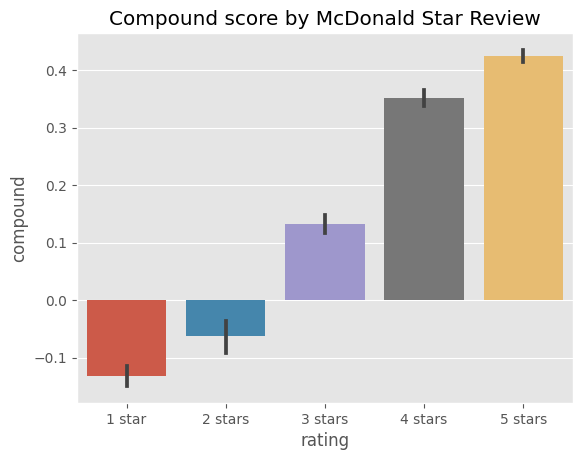

In [39]:
vader_sorted=vader.sort_values(by='rating')
pl=sns.barplot(data=vader_sorted,x='rating',y='compound')
pl.set_title('Compound score by McDonald Star Review')
plt.show()

In [40]:
# Define the conditions and corresponding replacement strings
conditions = [
    vader['compound'] <=-0.05,
    (vader['compound'] >-0.05) & (vader['compound'] <0.05),
    vader['compound'] >= 0.05
]

replacement_strings = ['Negative', 'Neutral', 'Positive']
# Use numpy.select to replace values based on the conditions
vader['compound'] = np.select(conditions, replacement_strings, default='Unknown')


In [41]:
vader['compound'].value_counts()

compound
Positive    5347
Neutral     2810
Negative    1843
Name: count, dtype: int64

In [42]:
X=vader['review']
y=vader['compound']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

## Text Vectorization 
This technique is used to convert text/sequence of data to meaningful numbers which represents sentiments/emotions.

In [44]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray()

## Split the data into training set and test set

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
model1 = SVC()
model2=GaussianNB()

## Training the model on the Training set

In [48]:
model1.fit(X_train, y_train)
model2.fit(X_train,y_train)

GaussianNB()

In [49]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
print(y_pred1)
print(y_pred2)

['Positive' 'Positive' 'Negative' ... 'Positive' 'Neutral' 'Neutral']
['Neutral' 'Neutral' 'Neutral' ... 'Negative' 'Neutral' 'Neutral']


In [50]:
print("SVM",accuracy_score(y_test,y_pred1))
print("Naive Bayes",accuracy_score(y_test,y_pred2))

SVM 0.8715
Naive Bayes 0.369


SVM is showing better performance compared with Naive Bayes. (Try some other Algorithms like Random Forest and variations of Naive Bayes such as MultinomialNB, BernoulliNB.)

## Predicting results for Review Examples

### 1.Using SVM

In [51]:
def predict_sentiment(review):
    review_trans=vectorizer.transform([review]).toarray()
    sentiment=model1.predict(review_trans)
    return sentiment

In [52]:
new_review='Good food'
predict_sentiment=predict_sentiment(new_review)
print(predict_sentiment)

['Positive']


### 2. Using Naive Bayes

In [53]:
def predict_sentiment(review):
    review_trans=vectorizer.transform([review]).toarray()
    sentiment=model2.predict(review_trans)
    return sentiment

In [54]:
new_review='Good food'
predict_sentiment=predict_sentiment(new_review)
print(predict_sentiment)

['Neutral']


### Coclusion: SVM is giving better prediction when compared with Naive Bayes. Sentiment Analysis can also be done using OpenAI GPT-3.5 and BERT models which accurately assess the emotional tone of text, enabling businesses to gain valuable insights into customer opinions and preferences.